In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [64]:
## Samsung

In [5]:
samsung_train = pd.read_csv('final_data/samsung_train.csv',parse_dates = ['date'])
samsung_test = pd.read_csv('final_data/samsung_test.csv',parse_dates = ['date'])

In [6]:
samsung_train.drop(0,axis=0,inplace = True)

In [7]:
samsung_train = samsung_train.reset_index(drop=True)

In [9]:
remove_idx = []
for idx,i in enumerate(samsung_train['samsung_change']):
    if i == 0:
        samsung_train['up_count'][idx-1] += samsung_train['up_count'][idx]
        samsung_train['down_count'][idx-1] += samsung_train['down_count'][idx]
        samsung_train['news_up'][idx-1] += samsung_train['news_up'][idx]
        samsung_train['news_down'][idx-1] += samsung_train['news_down'][idx]
        remove_idx.append(idx)
samsung_train.drop(remove_idx,axis=0,inplace = True)

In [14]:
remove_idx = []
for idx,i in enumerate(samsung_test['change']):
    if i == 0:
        samsung_test['up_count'][idx-1] += samsung_test['up_count'][idx]
        samsung_test['down_count'][idx-1] += samsung_test['down_count'][idx]
        samsung_test['news_up_count'][idx-1] += samsung_test['news_up_count'][idx]
        samsung_test['news_down_count'][idx-1] += samsung_test['news_down_count'][idx]
        remove_idx.append(idx)
samsung_test.drop(remove_idx,axis=0,inplace = True)

In [32]:
samsung_train['down_count'] = -samsung_train['down_count']
samsung_train['news_down'] = -samsung_train['news_down']

In [33]:
samsung_test['down_count'] = -samsung_test['down_count']
samsung_test['news_down_count'] = -samsung_test['news_down_count']

In [ ]:
## 뉴스와 investing 반응 구분

In [34]:
train_x = samsung_train.drop(['date','samsung_change'],axis=1)
train_y = samsung_train['samsung_change'].apply(lambda x: 1 if x>0 else 0)

In [35]:
test_x = samsung_test.drop(['date','change'],axis=1)
test_y = samsung_test['change'].apply(lambda x: 1 if x > 0 else 0)

In [36]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(train_x,train_y)
accuracy_score(test_y,rf.predict(test_x))

0.45454545454545453

In [37]:
lgbm = LGBMClassifier(random_state = 42)
lgbm.fit(train_x,train_y)
accuracy_score(test_y,lgbm.predict(test_x))

0.45454545454545453

In [39]:
## 뉴스와 investing 반응 구분 X

In [41]:
samsung_train2 = samsung_train.copy()
samsung_test2 = samsung_test.copy()
samsung_train2['up'] = samsung_train2['up_count'] + samsung_train2['news_up']
samsung_test2['up'] = samsung_test2['up_count'] + samsung_test2['news_up_count']
samsung_train2['down'] = samsung_train2['down_count'] + samsung_train2['news_down']
samsung_test2['down'] = samsung_test2['down_count'] + samsung_test2['news_down_count']

In [48]:
train_x2 = samsung_train2[['samsung_price','up','down']]
test_x2 = samsung_test2[['price','up','down']]

In [44]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(train_x2,train_y)
accuracy_score(test_y,rf.predict(test_x2))

0.36363636363636365

In [49]:
lgbm = LGBMClassifier(random_state = 42)
lgbm.fit(train_x2,train_y)
accuracy_score(test_y,lgbm.predict(test_x2))

0.45454545454545453

In [55]:
train_x['samsung_price'] = StandardScaler().fit_transform(train_x['samsung_price'].values.reshape(-1,1))

In [56]:
train_x2['samsung_price'] = StandardScaler().fit_transform(train_x2['samsung_price'].values.reshape(-1,1))

In [60]:
rf.fit(train_x,train_y)
accuracy_score(train_y,rf.predict(train_x))

1.0

In [61]:
lgbm.fit(train_x,train_y)
accuracy_score(train_y,lgbm.predict(train_x))

0.8609625668449198

In [62]:
rf.fit(train_x2,train_y)
accuracy_score(train_y,rf.predict(train_x2))

1.0

In [63]:
lgbm.fit(train_x2,train_y)
accuracy_score(train_y,lgbm.predict(train_x2))

0.8609625668449198

In [152]:
naver_train = pd.read_csv('final_data/naver_train.csv',parse_dates = ['date'])
naver_test = pd.read_csv('final_data/naver_test.csv',parse_dates = ['date'])

In [153]:
naver_train['naver_price'] = MinMaxScaler().fit_transform(naver_train['naver_price'].values.reshape(-1,1))

In [154]:
naver_test['price'] = MinMaxScaler().fit_transform(naver_test['price'].values.reshape(-1,1))

In [155]:
naver_train.fillna(0,inplace=True)

In [156]:
naver_train.drop(0,axis=0,inplace = True)
naver_train = naver_train.reset_index(drop=True)

In [157]:
remove_idx = []
for idx,i in enumerate(naver_train['naver_change']):
    if i == 0:
        naver_train['up_count'][idx-1] += naver_train['up_count'][idx]
        naver_train['down_count'][idx-1] += naver_train['down_count'][idx]
        naver_train['news_up_count'][idx-1] += naver_train['news_up_count'][idx]
        naver_train['news_down_count'][idx-1] += naver_train['news_down_count'][idx]
        remove_idx.append(idx)
naver_train.drop(remove_idx,axis=0,inplace = True)

In [158]:
remove_idx = []
for idx,i in enumerate(naver_test['change']):
    if i == 0:
        naver_test['up_count'][idx-1] += naver_test['up_count'][idx]
        naver_test['down_count'][idx-1] += naver_test['down_count'][idx]
        naver_test['news_up_count'][idx-1] += naver_test['news_up_count'][idx]
        naver_test['news_down_count'][idx-1] += naver_test['news_down_count'][idx]
        remove_idx.append(idx)
naver_test.drop(remove_idx,axis=0,inplace = True)

In [159]:
naver_train['down_count'] = -naver_train['down_count']
naver_train['news_down_count'] = -naver_train['news_down_count']

In [160]:
naver_test['down_count'] = -naver_test['down_count']
naver_test['news_down_count'] = -naver_test['news_down_count']

In [161]:
## 컬럼 구분

In [162]:
train_x = naver_train.drop(['date','naver_change'],axis=1)
train_y = naver_train['naver_change'].apply(lambda x: 1 if x>0 else 0)
test_x = naver_test.drop(['date','change'],axis=1)
test_y = naver_test['change'].apply(lambda x: 1 if x>0 else 0)

In [163]:
rf.fit(train_x,train_y)
accuracy_score(test_y,rf.predict(test_x))

0.5454545454545454

In [164]:
lgbm.fit(train_x,train_y)
accuracy_score(test_y,lgbm.predict(test_x))

0.6363636363636364

In [165]:
## 컬럼 구분 X

In [166]:
naver_train['up'] = naver_train['up_count'] + naver_train['news_up_count']
naver_train['down'] = naver_train['down_count'] + naver_train['news_down_count']

naver_test['up'] = naver_test['up_count'] + naver_test['news_up_count']
naver_test['down'] = naver_test['down_count'] + naver_test['news_down_count']

In [167]:
train_x = naver_train[['naver_price','up','down']]
test_x = naver_test[['price','up','down']]

In [168]:
rf.fit(train_x,train_y)
accuracy_score(test_y,rf.predict(test_x))

0.7272727272727273

In [169]:
lgbm.fit(train_x,train_y)
accuracy_score(test_y,lgbm.predict(test_x))

0.8181818181818182

## 셀트리온

In [172]:
cell_bert = pd.read_csv('bert_data/final_bert_celltrion.csv',parse_dates = ['date'])
cell_stock = pd.read_csv('stock_price/pre_celltrion_1_10.csv',parse_dates = ['date'])

In [177]:
cell_merge = pd.merge(cell_stock,cell_bert,on='date',how='left').fillna(0)
cell_merge.columns = ['date','celltrion_price','celltrion_change','news_up_count','news_down_count']

In [180]:
cell_investing = pd.read_csv('investing/celltrion-inc_investing.csv',parse_dates = ['date'])

In [207]:
celltrion_train = pd.merge(cell_investing,cell_merge,on='date',how='right')

In [209]:
celltrion_train['celltrion_change'] = celltrion_train['celltrion_change'].apply(lambda x: float(x[:-1]))
celltrion_train.to_csv('final_data/celltrion_train.csv',index=False)

In [210]:
cell_test_bert = pd.read_csv('bert_data/test/final_bank_bert_test.csv',parse_dates = ['date'])

In [214]:
cell_test_price = pd.read_csv('test_data/pre_celltrion_11.csv',parse_dates = ['date'])
cell_test_price['price'] = cell_test_price['price'].apply(lambda x: float(x.replace(',','')))
cell_test_price['change'] = cell_test_price['change'].apply(lambda x: float(x[:-1]))

In [216]:
cell_test_investing = pd.read_excel('test_data/celltrion_investing_test.xlsx')

In [219]:
cell_test_investing['date'] = pd.to_datetime(cell_test_investing['date'])

In [221]:
cell_test_bert.columns= ['date','news_up_count','news_down_count']

In [225]:
cell_test = pd.merge(cell_test_investing,cell_test_price,on='date')

In [229]:
cell_test = pd.merge(cell_test,cell_test_bert,on='date',how='left').fillna(0)

In [231]:
cell_test.to_csv('final_data/celltrion_test.csv',index=False)

<AxesSubplot:xlabel='date', ylabel='price'>

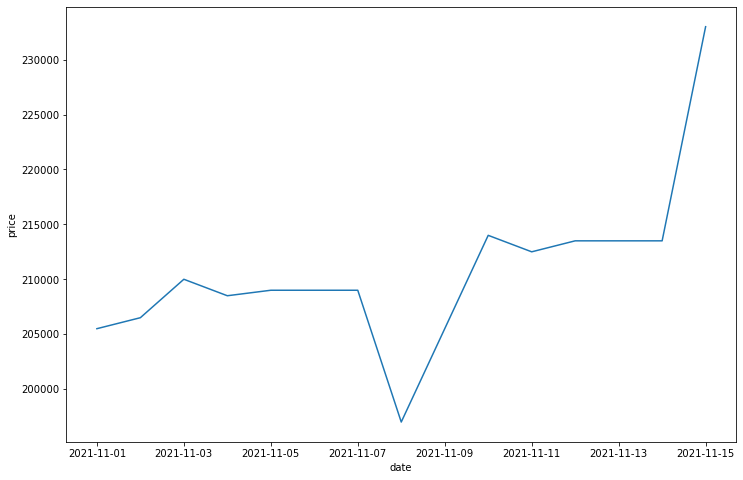

In [233]:
plt.figure(figsize=(12,8))
plt.title('celltrion test')
sns.lineplot(cell_test['date'],cell_test['price'])

In [242]:
celltrion_train.drop(0,axis=0,inplace = True)

In [243]:
remove_idx = []
for idx,i in enumerate(celltrion_train['celltrion_change']):
    if i == 0:
        celltrion_train['up_count'][idx-1] += celltrion_train['up_count'][idx]
        celltrion_train['down_count'][idx-1] += celltrion_train['down_count'][idx]
        celltrion_train['news_up_count'][idx-1] += celltrion_train['news_up_count'][idx]
        celltrion_train['news_down_count'][idx-1] += celltrion_train['news_down_count'][idx]
        remove_idx.append(idx)
celltrion_train.drop(remove_idx,axis=0,inplace = True)

In [246]:
celltrion_train = celltrion_train.reset_index(drop=True)

In [251]:
remove_idx = []
for idx,i in enumerate(cell_test['change']):
    if i == 0:
        cell_test['up_count'][idx-1] += cell_test['up_count'][idx]
        cell_test['down_count'][idx-1] += cell_test['down_count'][idx]
        cell_test['news_up_count'][idx-1] += cell_test['news_up_count'][idx]
        cell_test['news_down_count'][idx-1] += cell_test['news_down_count'][idx]
        remove_idx.append(idx)
cell_test.drop(remove_idx,axis=0,inplace = True)

In [252]:
cell_test = cell_test.reset_index(drop=True)

In [257]:
celltrion_train = celltrion_train.sort_values('date').reset_index(drop=True)

In [264]:
train_x = celltrion_train['celltrion_price'].values.reshape(-1,1)
train_y = celltrion_train['celltrion_change'].apply(lambda x: 1 if x>0 else 0)
test_x = cell_test['price'].values.reshape(-1,1)
test_y = cell_test['change'].apply(lambda x: 1 if x>0 else 0)

In [267]:
train_x = StandardScaler().fit_transform(train_x)
test_x = StandardScaler().fit_transform(test_x)

In [268]:
rf.fit(train_x,train_y)
accuracy_score(test_y,rf.predict(test_x))

0.18181818181818182

In [269]:
lgbm.fit(train_x,train_y)
accuracy_score(test_y,lgbm.predict(test_x))

0.2727272727272727

In [285]:
celltrion_train['down_count'] = -celltrion_train['down_count']
cell_test['down_count'] = -cell_test['down_count']

In [275]:
train_x = celltrion_train[['celltrion_price','up_count','down_count']]
test_x = cell_test[['price','up_count','down_count']]

In [287]:
train_x['celltrion_price'] = StandardScaler().fit_transform(train_x['celltrion_price'].values.reshape(-1,1))
test_x['price'] = StandardScaler().fit_transform(test_x['price'].values.reshape(-1,1))

In [288]:
rf.fit(train_x,train_y)
accuracy_score(test_y,rf.predict(test_x))

0.36363636363636365

In [289]:
lgbm.fit(train_x,train_y)
accuracy_score(test_y,lgbm.predict(test_x))

0.2727272727272727

In [290]:
celltrion_train['news_down_count'] = - celltrion_train['news_down_count']
cell_test['news_down_count'] = -cell_test['news_down_count']

In [291]:
train_x = celltrion_train[['celltrion_price','up_count','down_count','news_up_count','news_down_count']]
test_x = cell_test[['price','up_count','down_count','news_up_count','news_down_count']]

In [294]:
train_x['celltrion_price'] = StandardScaler().fit_transform(train_x['celltrion_price'].values.reshape(-1,1))
test_x['price'] = StandardScaler().fit_transform(test_x['price'].values.reshape(-1,1))

In [295]:
rf.fit(train_x,train_y)
accuracy_score(test_y,rf.predict(test_x))

0.36363636363636365

In [296]:
lgbm.fit(train_x,train_y)
accuracy_score(test_y,lgbm.predict(test_x))

0.36363636363636365

In [298]:
train_x['up'] = train_x['up_count'] + train_x['news_up_count']
train_x['down'] = train_x['down_count'] + train_x['news_down_count']

In [299]:
test_x['up'] = test_x['up_count'] + test_x['news_up_count']
test_x['down'] = test_x['down_count'] + test_x['news_down_count']

In [300]:
train_x.drop(['up_count','news_up_count','down_count','news_down_count'],axis=1,inplace = True)
test_x.drop(['up_count','news_up_count','down_count','news_down_count'],axis=1,inplace = True)

In [302]:
rf.fit(train_x,train_y)
accuracy_score(test_y,rf.predict(test_x))

0.36363636363636365

In [303]:
lgbm.fit(train_x,train_y)
accuracy_score(test_y,lgbm.predict(test_x))

0.45454545454545453